<a href="https://colab.research.google.com/github/AnaBelenCarbajal/Thesis/blob/main/Pre_trainig_Animal_shapes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset animal shapes**

1) installing packages

In [4]:
!pip install osculari

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nv

In [5]:
# importing required packages
import osculari

import numpy as np
from matplotlib import pyplot as plt
import torch
import os
from random import choice
import pandas as pd

from torchvision.datasets import ImageFolder
from torchvision.io import read_image, ImageReadMode
from torch.utils.data import Dataset
import torchvision.transforms.functional as transform
from torchvision import transforms
from torchvision.transforms import v2
from torchvision.transforms import Pad
from torch.utils.data import DataLoader

from PIL import Image

2) I uploaded images180.zip to this collab, it needs to be unzipped

In [6]:
# unzip folder (previously uploaded in collab)
!unzip images180.zip -d my_data

Streaming output truncated to the last 5000 lines.
  inflating: my_data/images180/images224/horse/88.png  
  inflating: my_data/__MACOSX/images180/images224/horse/._88.png  
  inflating: my_data/images180/images224/horse/77.png  
  inflating: my_data/__MACOSX/images180/images224/horse/._77.png  
  inflating: my_data/images180/images224/horse/63.png  
  inflating: my_data/__MACOSX/images180/images224/horse/._63.png  
  inflating: my_data/images180/images224/horse/62.png  
  inflating: my_data/__MACOSX/images180/images224/horse/._62.png  
  inflating: my_data/images180/images224/horse/76.png  
  inflating: my_data/__MACOSX/images180/images224/horse/._76.png  
  inflating: my_data/images180/images224/horse/89.png  
  inflating: my_data/__MACOSX/images180/images224/horse/._89.png  
  inflating: my_data/images180/images224/horse/60.png  
  inflating: my_data/__MACOSX/images180/images224/horse/._60.png  
  inflating: my_data/images180/images224/horse/74.png  
  inflating: my_data/__MACOSX/im

3) Root: directory to the filder containing the aniam categories

In [7]:
# root directory to data
root = "my_data/images180/images180/"

4) Labels: categories

In [8]:
# get category labels
labels = os.listdir(root)

#remove ".DS_Store"
labels.remove(".DS_Store")

5) Retrieve label and image information in dictionary for every image -> list of dictionaries

In [9]:
# get list of dictionaries with respective label and image number for all images
data = []

for label in labels:
  folder_path = root + label
  shapes = os.listdir(folder_path)
  for shape in shapes:
    category_dict = {'label': label, 'image': shape}
    data.append(category_dict)

6) Retireve image directory

In [10]:
# function to get image directory
def image_direct(root, category_dict_item):
  return root + category_dict_item['label'] + "/" + category_dict_item['image']

# get image directories
img_dir = []
for image in data:
  direct = image_direct(root, image)
  img_dir.append(direct)

8) Append image directory and size to dictionary

In [11]:
# add img_dir and img_size to data
for img in data:
  for dir in img_dir:
    img['img_dir'] = dir

Compute random positions -> random

In [12]:
# height, width combinations
combinations = []
for left_and_right in range(-22,23):
    for up_and_down in range(-22,23):
        combinations.append((left_and_right, up_and_down))

# margins
left = 22
right = 22
top = 22
bottom = 22

# make combinations for left, top, right and bottom
i = 0
new_combinations = []
for position in combinations:
  left_new = left - position[0]
  right_new = right + position[0]
  top_new = top + position[1]
  bottom_new = bottom - position[1]
  new_combinations.append([left_new, top_new, right_new, bottom_new])

# random positions
positions = []
for i in new_combinations:
  pd.Series([1, 2, 3])
  j = pd.Series(i)
  jj = j.to_list()
  positions.append(jj)

9) Class ShapeImagesDataset

Requires:
- data (list of dictionnaries)
- img_dir (list of image directiories)
- labels (list of labels)

Output:
This class returns 2 images, 50% of the times wihtin the same category and 50% from other category
- img1 = tensor img1
- img2 - tensor img2
- same = ground truth (same category 1 or different 0)


In [13]:
class ShapeImageDataset (Dataset):
  # return two images, with 50% chance in same or different category and ground truth

  # __init__
  def __init__(self, data, img_dir, labels, transform=None):
    self.img_labels = data
    self.img_dir = img_dir
    self.labels = labels
    self.transform = transform
    self.same_category = [1, 0]

  # __len__
  def __len__(self):
    return len(self.img_labels)

  ### funtions for __getitem__ ###

  # we start by picking another category as the current image
  def pick_other_category(self, label):
    other_categories = []

    for cat in self.labels:
      if cat != label:
        other_categories.append(cat)

    return choice(other_categories)

  # we select an image from the other category
  def select_random_image(self, label):
    result = []
    for item in self.img_labels:
      if item["label"] == label:
        result.append(item)
    return choice(result)

  # function to read both images
  def read_image_from_directory(self, category_dict_item):
    return read_image(image_direct(root, category_dict_item), ImageReadMode.RGB)

  # __getitem__
  def __getitem__(self, idx):
    current_image = self.img_labels[idx]
    same = choice(self.same_category)
    current_label = current_image["label"]
    if same == 1:
      category = current_label
    else:
      category = self.pick_other_category(current_label)

    other_image = self.select_random_image(category)
    img1 = self.read_image_from_directory(current_image)
    img2 = self.read_image_from_directory(other_image)

    if self.transform:
      img1 = self.transform(img1)
      img2 = self.transform(img2)

    return img1, img2, same

10) network

In [57]:
#network
architecture = 'resnet50'        # network's architecture
weights = 'resnet50'             # the pretrained weights
img_size = 224                   # network's input size
layer = 'block4'                 # the readout layer
pooling = None
readout_kwargs = {               # parameters for extracting features from the pretrained network
    'architecture': architecture,
    'weights': weights,
    'layers': layer,
    'img_size': img_size,
    'pooling': pooling
}
net_2afc = osculari.models.paradigm_2afc_merge_concatenate(**readout_kwargs)

11) Creating dataset (len=2000)

In [60]:
preprocess = v2.Compose(
    [   #v2.Pad(padding = choice(positions), fill=128),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        v2.ColorJitter(brightness=(0.8, 10), contrast=(0.6,1), saturation=0, hue=0.5),
    ]
)

In [54]:
pretraining_dataset = ShapeImageDataset(data, img_dir, labels, preprocess)
len(pretraining_dataset)

2000

In [55]:
pretraining_dataset[1000]

(tensor([[[0.1867, 0.1867, 0.1867,  ..., 0.1867, 0.1867, 0.1867],
          [0.1867, 0.1867, 0.1867,  ..., 0.1867, 0.1867, 0.1867],
          [0.1867, 0.1867, 0.1867,  ..., 0.1867, 0.1867, 0.1867],
          ...,
          [0.1867, 0.1867, 0.1867,  ..., 0.1867, 0.1867, 0.1867],
          [0.1867, 0.1867, 0.1867,  ..., 0.1867, 0.1867, 0.1867],
          [0.1867, 0.1867, 0.1867,  ..., 0.1867, 0.1867, 0.1867]],
 
         [[0.1186, 0.1186, 0.1186,  ..., 0.1186, 0.1186, 0.1186],
          [0.1186, 0.1186, 0.1186,  ..., 0.1186, 0.1186, 0.1186],
          [0.1186, 0.1186, 0.1186,  ..., 0.1186, 0.1186, 0.1186],
          ...,
          [0.1186, 0.1186, 0.1186,  ..., 0.1186, 0.1186, 0.1186],
          [0.1186, 0.1186, 0.1186,  ..., 0.1186, 0.1186, 0.1186],
          [0.1186, 0.1186, 0.1186,  ..., 0.1186, 0.1186, 0.1186]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [17]:
# experiment-dependent function to process an epoch of data
epoch_fun = osculari.paradigms.forced_choice.epoch_loop

In [18]:
dataset_loader = DataLoader(pretraining_dataset, 64)

12) training

In [59]:
# calling the generic train_linear_probe function
training_log = osculari.paradigms.paradigm_utils.train_linear_probe(
    net_2afc, dataset_loader, epoch_fun, 'my_data/osculari_test/', device="cuda",
    epochs = 10)

# fine transformation? --> look into pytorch
# make learning rate smaller (somewher ien the funciton --> train_linear_probe)

[000] accuracy=0.512 loss=231.111
[001] accuracy=0.497 loss=477.314
[002] accuracy=0.477 loss=600.063
[003] accuracy=0.506 loss=531.004
[004] accuracy=0.478 loss=697.034
[005] accuracy=0.543 loss=595.699
[006] accuracy=0.544 loss=479.602
[007] accuracy=0.544 loss=429.238
[008] accuracy=0.525 loss=464.674
[009] accuracy=0.514 loss=464.776


In [ ]:
# last row accuracy after 100 epochs: accuracy=0.750 loss=365.129

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dic = '/content/drive/MyDrive/Thesis/Exp 3: Neural_network/Pre-training on Animals shapes/'

In [ ]:
# save model's weigths
PATH = dic + 'weights_224.pt'
torch.save(net_2afc.state_dict(), PATH)

In [ ]:
PATH

'/content/drive/MyDrive/Thesis/Exp 3: Neural_network/Pre-training on Animals shapes/weights_224.pt'

In [ ]:
# Model class must be defined somewhere
loaded_weights = torch.load(PATH)

In [ ]:
loaded_weights

OrderedDict([('backbone.0.weight',
              tensor([[[[-7.4457e-03, -3.1783e-03,  3.7353e-02,  ...,  4.7936e-02,
                         -2.0325e-02,  8.8140e-03],
                        [-5.7435e-02,  4.4709e-02,  7.7509e-02,  ...,  8.8442e-02,
                          2.9346e-02, -5.8331e-02],
                        [ 6.8356e-02, -2.7044e-01,  4.0348e-01,  ..., -1.6491e-01,
                          2.1868e-01, -7.2909e-02],
                        ...,
                        [-1.0874e-01,  3.8148e-01, -4.5487e-01,  ...,  6.8366e-01,
                         -5.7855e-01,  2.2461e-01],
                        [ 2.5698e-02, -1.7703e-01,  6.4375e-01,  ...,  5.2644e-01,
                         -4.9317e-02, -6.8082e-02],
                        [ 4.5281e-02, -1.3072e-01,  1.7864e-02,  ..., -3.5753e-01,
                          1.8976e-01, -2.2302e-02]],
              
                       [[ 8.9197e-03,  4.8768e-03, -1.5356e-02,  ...,  8.6949e-02,
                         -6

In [ ]:
#network
architecture = 'resnet50'        # network's architecture
weights = 'resnet50'             # the pretrained weights
img_size = 224                   # network's input size
layer = 'block4'                 # the readout layer
pooling = None
readout_kwargs = {               # parameters for extracting features from the pretrained network
    'architecture': architecture,
    'weights': weights,
    'layers': layer,
    'img_size': img_size,
    'pooling': pooling
}
loaded_model = osculari.models.paradigm_2afc_merge_concatenate(**readout_kwargs)

In [ ]:
loaded_model.load_state_dict(loaded_weights)

<All keys matched successfully>

11) Plotting dataset

In [26]:
# create random numbers from 0 to 1999 to create pairs of shapes
randoms = np.random.randint(0, 1999, 4)
randoms

array([ 917,  888, 1513,  647])

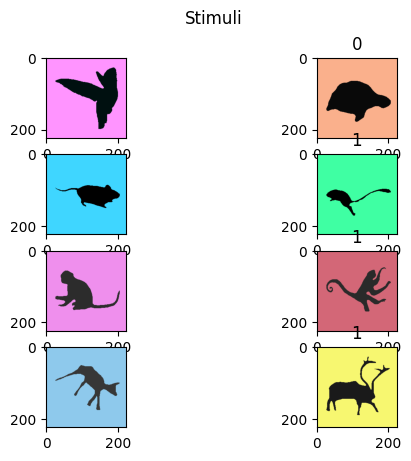

In [58]:
fig, ax = plt.subplots(4, 2)
fig.suptitle("Stimuli")

for idx, random in enumerate(randoms):
  pairs = pretraining_dataset[random]
  img1 = pairs[0]
  img2 = pairs[1]
  gt = pairs[2]

  ax[idx][0].imshow(transform.to_pil_image(img1))

  title = str(gt)
  ax[idx][1].set_title(title)
  ax[idx][1].imshow(transform.to_pil_image(img2))